# 1. Setup

In [1]:
import tensorflow as tf
import mitdeeplearning as mdl
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

In [2]:
# Check if GPU is available
assert len(tf.config.list_physical_devices('GPU')) > 0

# 2. Dataset

First we need to load the dataset

In [12]:
# Load the dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Now, we gonna adjust the data on the correct format:

In [13]:
train_images = (np.expand_dims(train_images, axis=-1)/255.0).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.0).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

Our training set is made up of 28x28 grayscale images of handwritten digits.                                      
Let's visualize what some of these images and their corresponding training labels look like

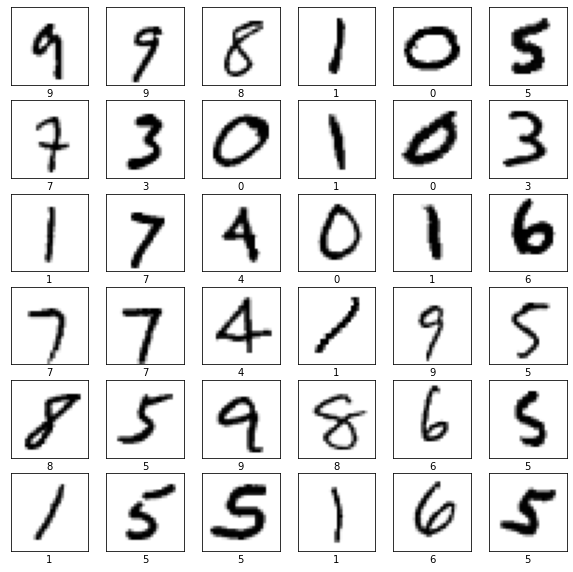

In [14]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

# 3. Neural Network for Handwritten Digit Classification

We'll first build a simple neural network consisting of two fully connected layers and apply this to the digit classification task. Our network will ultimately output a probability distribution over the 10 digit classes (0-9). This first architecture we will be building is depicted below

In [16]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
      # First define a Flatten layer
      tf.keras.layers.Flatten(),

      # Define the activation function for the first fully connected (Dense) layer.'''
      tf.keras.layers.Dense(128, activation=tf.nn.relu),

      # Define the second Dense layer to output the classification probabilities'''
      tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
      
  ])
  return fc_model

model = build_fc_model()

As we progress through this next portion, you may find that you'll want to make changes to the architecture defined above. Note that in order to update the model later on, you'll need to re-run the above cell to re-initialize the model.

Let's take a step back and think about the network we've just created. The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a 2d-array (28 x 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. You can think of this layer as unstacking rows of pixels in the image and lining them up. There are no learned parameters in this layer; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are fully-connected neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer (which you've defined!) should return an array of probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the handwritten digit classes.

That defines our fully connected model!

In [17]:
# Compile the Model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# Train the Model
BATCH_SIZE = 64
EPOCHS = 5

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 4s 2ms/step - loss: 0.3618 - accuracy: 0.8995
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1944 - accuracy: 0.9456
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1480 - accuracy: 0.9579
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1207 - accuracy: 0.9660
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1016 - accuracy: 0.9715


In [19]:
# Test the accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1039 - accuracy: 0.9695
Test accuracy: 0.9695000052452087


# 4. Convolutional Neural Network (CNN) for handwritten digit classification

### 4.1 Define the Model
We'll use the same training and test datasets as before, and proceed similarly as our fully connected network to define and train our new CNN model. To do this we will explore two layers we have not encountered before: you can use `keras.layers.Conv2D` to define convolutional layers and `keras.layers.MaxPool2D` to define the pooling layers.               
Use the parameters shown in the network architecture above to define these layers and build the CNN model.

In [23]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        # Define the first convolutional layer
        # -> 24 filters
        # -> 3x3 each filter
        # -> ReLu activation function
        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),

        # Define the first max pooling layer
        # MaxPool with 2x2 filters and strider=2
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        # Define the second convolutional layer
        # -> 36 filters
        # -> 3x3 each filter
        # -> ReLu activation function
        tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation=tf.nn.relu),

        # Define the second max pooling layer
        # MaxPool with 2x2 filters and strider=2
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        
        # Define the flatten layer
        # Essencial to feed the incoming Dense layers
        tf.keras.layers.Flatten(),
        
        # Define the first Dense layer  
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # Define the last Dense layer to output the classification probabilities. 
        # Pay attention to the activation needed a probability output
        # -> 10 outputs (numbers between 0-9)
        # -> softmax because divide the values of the probability for each output (pick the higher, most probable!!)
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    return cnn_model

### 4.2 Build the Model

In [24]:
# Build the Model
cnn_model = build_cnn_model()

### 4.3 Evaluate the Model

In [25]:
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 24)        240       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 24)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 36)        7812      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 36)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 900)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               115328    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

### 4.4 Train the Model

In [26]:
# Define the compile operation with your optimizer and learning rate of choice
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
# Use model.fit to train the CNN model, with the same batch_size and number of epochs previously used.
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 5s 4ms/step - loss: 0.1742 - accuracy: 0.9475
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0515 - accuracy: 0.9841
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0369 - accuracy: 0.9884
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0276 - accuracy: 0.9912
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0201 - accuracy: 0.9937


In [28]:
# Use the evaluate method to test the model!
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0282 - accuracy: 0.9899
Test accuracy: 0.9898999929428101


### 4.5 Make predictions with the CNN Model

In [29]:
predictions = cnn_model.predict(test_images)

In [30]:
predictions[0]

array([5.2867573e-08, 2.2052696e-08, 7.5743101e-06, 1.4034979e-06,
       5.4551985e-09, 8.5581711e-09, 5.7027456e-12, 9.9999082e-01,
       3.7885348e-09, 1.0716906e-07], dtype=float32)

In [31]:
prediction = np.argmax(predictions[0]) 
print(prediction)

7


Label of this digit is: 7


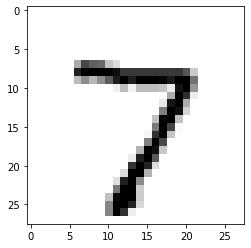

In [32]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)

We can also plot several images along with their predictions, where correct prediction labels are blue and incorrect prediction labels are grey. The number gives the percent confidence (out of 100) for the predicted label. Note the model can be very confident in an incorrect prediction!

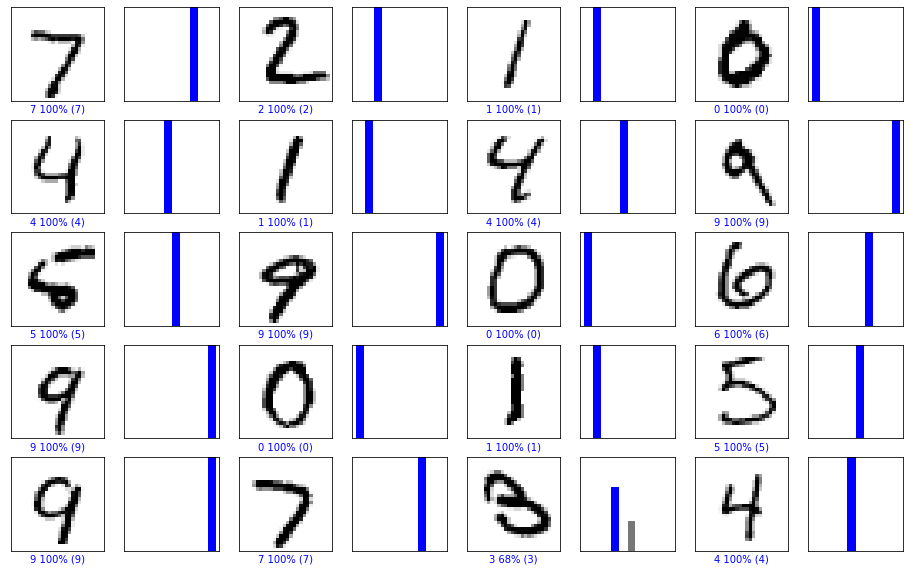

In [34]:
# Plots the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  mdl.lab2.plot_value_prediction(i, predictions, test_labels)

# 5. Training the Model 2.0
Earlier in the lab, we used the fit function call to train the model. This function is quite high-level and intuitive, which is really useful for simpler models. As you may be able to tell, this function abstracts away many details in the training call, and we have less control over training model, which could be useful in other contexts.

As an alternative to this, we can use the `tf.GradientTape` class to record differentiation operations during training, and then call the tf.GradientTape.gradient function to actually compute the gradients. You may recall seeing this in Lab 1 Part 1, but let's take another look at this here.

We'll use this framework to train our cnn_model using stochastic gradient descent.

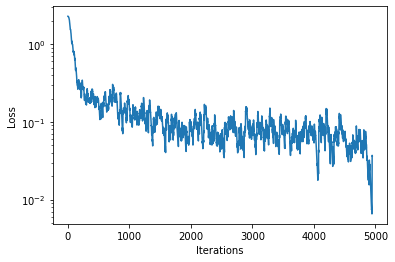

100%|██████████| 5000/5000 [00:40<00:00, 124.75it/s]


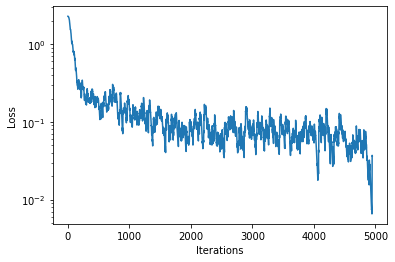

In [35]:
# Rebuild the CNN model
cnn_model = build_cnn_model()

batch_size = 12
loss_history = mdl.util.LossHistory(smoothing_factor=0.95) # to record the evolution of the loss
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss', scale='semilogy')
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2) # define our optimizer

if hasattr(tqdm, '_instances'): tqdm._instances.clear() # clear if it exists

for idx in tqdm(range(0, train_images.shape[0], batch_size)):
  # First grab a batch of training data and convert the input images to tensors
  (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
  images = tf.convert_to_tensor(images, dtype=tf.float32)

  # GradientTape to record differentiation operations
  with tf.GradientTape() as tape:
    # Feed the images into the model and obtain the predictions
    logits = cnn_model(images)

    # Compute the categorical cross entropy loss
    loss_value = tf.keras.backend.sparse_categorical_crossentropy(labels, logits)
    
  loss_history.append(loss_value.numpy().mean()) # append the loss to the loss_history record
  plotter.plot(loss_history.get())

  # Backpropagation
  # Use the tape to compute the gradient against all parameters in the CNN model.
  # Use cnn_model.trainable_variables to access these parameters. 
  grads = tape.gradient(loss_value, cnn_model.trainable_variables)
  
  optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))